In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("C:/Users/asus/Desktop/Semester 5/DSDA/Prak/Prak 7/Order_Bundle_WP.csv", sep=";") #Sesuaikan dengan directory file masing-masing

In [ ]:
data.head(4)

,Id,Penilaian_dari_pelanggan,Penilaian_dari_karyawan,Penilaian_dari_petinggi,Perlu_dipaket?
0,1,880,3,3,1
1,2,750,1,3,1
2,3,700,1,1,1
3,4,751,1,2,1


In [ ]:
data.dtypes

Id                          int64
Penilaian_dari_pelanggan    int64
Penilaian_dari_karyawan     int64
Penilaian_dari_petinggi     int64
Perlu_dipaket?              int64
dtype: object

In [ ]:
data.describe()

,Id,Penilaian_dari_pelanggan,Penilaian_dari_karyawan,Penilaian_dari_petinggi,Perlu_dipaket?
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,671.400000,2.733333,2.166667,0.700000
std,8.803408,99.421291,1.229896,0.833908,0.466092
min,1.000000,504.000000,1.000000,1.000000,0.000000
25%,8.250000,595.000000,1.250000,1.250000,0.000000
50%,15.500000,691.000000,3.000000,2.000000,1.000000
75%,22.750000,745.500000,4.000000,3.000000,1.000000
max,30.000000,880.000000,4.000000,3.000000,1.000000


In [ ]:
#Menentukan variabel independen dan dependen
X = data[['Penilaian_dari_pelanggan','Penilaian_dari_karyawan','Penilaian_dari_petinggi']]
y = data['Perlu_dipaket?']

In [ ]:
#Membagi data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.6, random_state = 0)

In [ ]:
#Penerapan regresi logistik
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

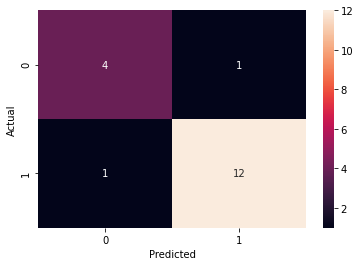

In [ ]:
#Menampilkan confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [ ]:
#Menampilkan akurasi dari prediksi
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.8888888888888888


In [ ]:
#Menampilkan data testing
print (X_test)

    Penilaian_dari_pelanggan  Penilaian_dari_karyawan  Penilaian_dari_petinggi
2                        700                        1                        1
28                       796                        4                        2
13                       649                        4                        3
10                       632                        3                        1
26                       627                        4                        1
24                       695                        3                        3
27                       770                        4                        2
11                       800                        2                        1
17                       536                        3                        3
22                       592                        2                        3
5                        582                        2                        1
16                       722                        

In [ ]:
#Menampilkan data hasil testing (prediksi)
print (y_pred)

[1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0]


In [ ]:
#Menguji data baru
new_predict = {'Penilaian_dari_pelanggan': [720,600],
               'Penilaian_dari_karyawan':[2,4],
               'Penilaian_dari_petinggi':[1,3]
                  }

df2 = pd.DataFrame(new_predict,columns= ['Penilaian_dari_pelanggan','Penilaian_dari_karyawan','Penilaian_dari_petinggi'])

In [ ]:
#Penerapan regresi logistik
y_pred=logistic_regression.predict(df2)

In [ ]:
#Menampilkan data testing
print (df2)

   Penilaian_dari_pelanggan  Penilaian_dari_karyawan  Penilaian_dari_petinggi
0                       720                        2                        1
1                       600                        4                        3


In [ ]:
#Menampilkan prediksi dari data testing
print (y_pred)

[1 1]


In [ ]:
#Menguji data baru
new_predict = {'Penilaian_dari_pelanggan': [560,660,700,600],
               'Penilaian_dari_karyawan':[2,2,4,1],
               'Penilaian_dari_petinggi':[1,2,2,1]
                  }

df2 = pd.DataFrame(new_predict,columns= ['Penilaian_dari_pelanggan','Penilaian_dari_karyawan','Penilaian_dari_petinggi'])

In [ ]:
#Penerapan regresi logistik
y_pred=logistic_regression.predict(df2)

In [ ]:
#Menampilkan data testing
print (df2)

   Penilaian_dari_pelanggan  Penilaian_dari_karyawan  Penilaian_dari_petinggi
0                       560                        2                        1
1                       660                        2                        2
2                       700                        4                        2
3                       600                        1                        1


In [ ]:
#Menampilkan prediksi dari data testing
print (y_pred)

[0 1 1 0]
